In [1]:
%matplotlib inline

### 검정
- 이항 검정 - 베르누이 분포 모수
- 카이 제곱 검정 - 카테고리 분포 모수
- 단일 표본 z-검정 - 분산값을 아는 경우 **정규 분포 기댓값 조사**
- 단일 표본 t-검정 - **정규 분포 표본 기댓값 조사**
- 독립 표본 t-검정 - 독립적 정규 분포에서 나온 두 데이터 셋의 **기댓값 일치 체크**
- 대응 표본 t-검정 - 독립표본 t-검정 + 두집단의 샘플 1:1 대응
- 카이 제곱 분산 검정 - 정규 분포의 샘플 분산 값은 정규화하면 카이 제곱 분포를 따른다.

### 이항검정
이항분포를 통해 Bernoulli 분포 모수 검정

In [2]:
#scipy  Binomial test
sp.stats.binom_test(12,15) # 3.5%

0.035156250000000014

In [3]:
sp.stats.binom_test(13,15) # 0.7%, 1% 유의수준이어도 기각

0.0073852539062499983

N = 100, 유의수준1%, 언제부터 동전이 unfair?

In [4]:
sp.stats.binom_test(37,100) # 1.2%, 1% 유의수준이일때, 채택

0.012032975725363472

In [5]:
sp.stats.binom_test(36,100) # 0.6%, 1% 유의수준이일때, 기각

0.0066371205159261254

In [6]:
sp.stats.binom_test(63,100) # 1.2%, 1% 유의수준이일때, 채택

0.012032975725363472

In [7]:
sp.stats.binom_test(64,100) # 0.6%, 1% 유의수준이일때, 기각

0.0066371205159261254

## 카이 제곱 검정
goodness of fit, 카테고리 분포의 모수 검정

$$\sum_{k=1}^K \dfrac{(x_k - m_k)^2}{m_k^2}$$

In [8]:
N = 10
K = 4
theta_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2])

In [9]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.1999999999999993, pvalue=0.157724450396663)

연습 문제 4

4면체 주사위를 10번 던졌다.

1. 만약 10번 모두 같은 면이 나왔다면 유의 확률은 얼마인가?
1. 만약 9번이 같은 면이 나왔다면 유의 확률은 얼마인가?
1. 만약 8번이 같은 면이 나오고 다른 면이 2번 나왔다면 유의 확률은 얼마인가?
1. 만약 8번이 같은 면이 나오고 다른 두 면이 각각 1번씩 나왔다면 유의 확률은 얼마인가?
1. 만약 7번이 같은 면이 나오고 다른 세 면이 각각 1번씩 나왔다면 유의 확률은 얼마인가?

In [10]:
print(sp.stats.chisquare([0, 0, 0, 10])) #1
print(sp.stats.chisquare([1, 0, 0, 9])) #2
print(sp.stats.chisquare([2, 0, 0, 8])) #3 - 0.06%
print(sp.stats.chisquare([1, 1, 0, 8])) #4 - 0.09%
print(sp.stats.chisquare([1, 1, 1, 8])) #5 - 0.3%

Power_divergenceResult(statistic=30.0, pvalue=1.3800570312932553e-06)
Power_divergenceResult(statistic=22.799999999999997, pvalue=4.4450736470606521e-05)
Power_divergenceResult(statistic=17.199999999999999, pvalue=0.00064286025225389755)
Power_divergenceResult(statistic=16.399999999999999, pvalue=0.00093874205504504134)
Power_divergenceResult(statistic=13.363636363636363, pvalue=0.003912713985102536)


## 단일 표본 z-검정
분산 값을 알고 있는 경우 정규 분포의 표본에 대해 기댓값 조사

In [11]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [12]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu)/ np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

In [13]:
ztest_1samp(x) # 1.96% , 1% 유의수준일때 채택, 5% 유의수준일때 기각(=오류)

(2.3338341854824276, 0.019604406021683538)

In [14]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
ztest_1samp(x) # 표본을 100개로 늘렸을 때, p-value 54% -> 귀무가설 채택

(0.59808015534484993, 0.54978645086241684)

## 단일 표본 t-검정
정규분포의 표본에 대해 기댓값 조사

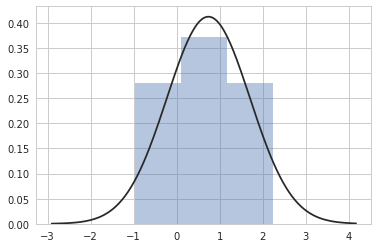

In [15]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [16]:
sp.stats.ttest_1samp(x, popmean=0) #디폴트 모수가 없다, popmean으로 지정
# 4.7%, 유의수준이 5%이상일 경우 오류 <- 데이터 수가 적기 때문!

Ttest_1sampResult(statistic=2.2894396723896699, pvalue=0.047818464908570578)

### 독립 표본 t-검정
두 독립적인 정규 분포 데이터 셋의 기대값 일치 여부 검사

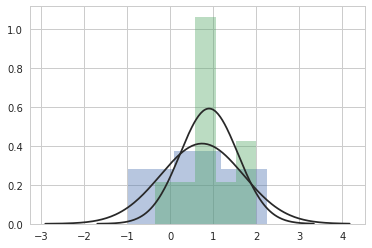

In [17]:
N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [18]:
# 분산이 다른 경우, equal_var = False 설정
sp.stats.ttest_ind(x1, x2, equal_var=True)  # 68%, 채택 <- 오류! <- 샘플이 적어서

Ttest_indResult(statistic=-0.41399685269886549, pvalue=0.68376768941164268)

연습5. 

1반과 2반 학생 들의 성적이 각각 다음과 같다고 가정하자.

1반 : 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점

2반 : 80점, 85점, 70점, 80점, 35점, 55점, 80점

1반의 실력이 2반보다 좋다고 이야기 할 수 있는가?

74.1666666667 69.2857142857
15.4968227438 18.1265393435


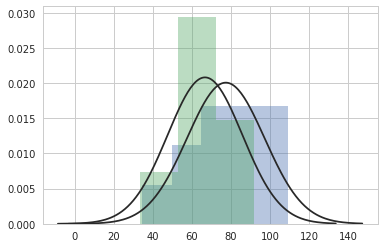

In [19]:
x1 = np.array([80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80])
x2 = np.array([80, 85, 70, 80, 35, 55, 80])
print(x1.mean(), x2.mean())
print(x1.std(ddof=1), x2.std(ddof=1))
X = sp.stats.norm(x1.mean(), x1.std(ddof=1)).rvs(len(x1))
Y = sp.stats.norm(x2.mean(), x2.std(ddof=1)).rvs(len(x2))
sns.distplot(X, kde=False, fit=sp.stats.norm)
sns.distplot(Y, kde=False, fit=sp.stats.norm)
plt.show()

In [20]:
# 분산이 다른 경우, equal_var = False 설정
sp.stats.ttest_ind(x1, x2, equal_var=False)  
# 56%, 채택 <- 오류! <- 샘플이 적어서

Ttest_indResult(statistic=0.59651962131716696, pvalue=0.56279018021376603)

## 대응 표본 t-검정
독립표본 + 샘플 1:1 대응

Ttest_relResult(statistic=-7.1723380661732756, pvalue=0.0020008849290622677)


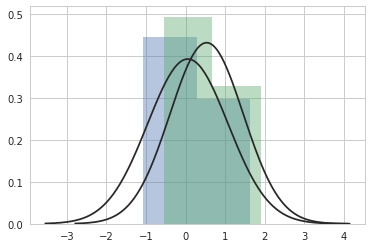

In [21]:
N = 5
mu_1 = 0
mu_2 = 0.5
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
print(sp.stats.ttest_rel(x1, x2))
plt.show()

연습 6

어느 학급의 9월달 성적과 10월달 성적이 다음과 같다. 점수는 학생 번호 순으로 배열되어 있다.

9월 : 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점

10월: 90점, 70점, 90점, 65점, 80점, 85점, 65점, 75점, 80점, 90점, 95점, 95점

이 학급의 실력은 더 향상되었다고 이야기 할 수 있는가?

74.1666666667 81.6666666667
15.4968227438 10.9406110294
Ttest_relResult(statistic=-2.6281127723493993, pvalue=0.023486192540203194)


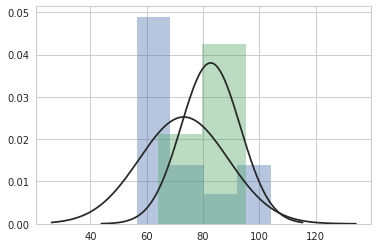

In [35]:
x1 = np.array([80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80])
x2 = np.array([90, 70, 90, 65, 80, 85, 65, 75, 80, 90, 95, 95])

print(x1.mean(), x2.mean())
print(x1.std(ddof=1), x2.std(ddof=1))

X = sp.stats.norm(x1.mean(), x1.std(ddof=1)).rvs(len(x1))
Y = sp.stats.norm(x2.mean(), x2.std(ddof=2)).rvs(len(x2))
sns.distplot(X, kde=False, fit=sp.stats.norm)
sns.distplot(Y, kde=False, fit=sp.stats.norm)
# print(sp.stats.ttest_rel(X, Y))
print(sp.stats.ttest_rel(x1, x2)) # 2% 정확도로 두 평균이 다르다는 것을 알아냄
plt.show() # 향상되었다.

---

## 카이 제곱 분산 검정
정규 분포의 샘플 분산 값은 정규화하면 카이 제곱 분포를 따른다.

In [23]:
def chi2var_test(x, sigma2=1):
    v = x.var(ddof=1)
    t = (len(x) - 1)*v/sigma2
    return t, sp.stats.chi2(df=len(x)-1).sf(np.abs(t))

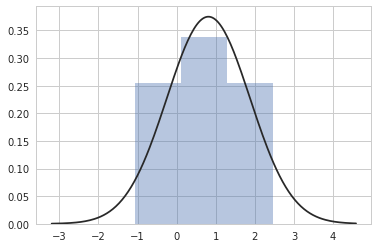

1.0637871321863899

In [24]:
N = 10
mu_0 = 0
sigma_0 = 1.1
np.random.seed(0)
x = sp.stats.norm(mu_0, sigma_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()
x.std()

In [25]:
chi2var_test(x) # 25%

(11.316430626053437, 0.25464123584764542)

## 등분산 검정
두 정규 분포로부터 생성된 두 개의 데이터 집합으로부터 두 정규 분포의 분산 모수가 같은지 확인

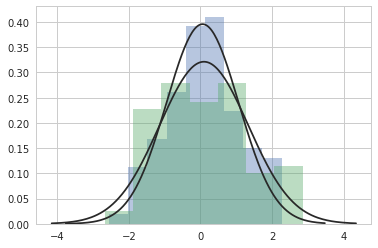

(1.0078822447165796, 1.2416003969261071)

In [26]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()
x1.std(), x2.std()

In [27]:
print(sp.stats.bartlett(x1, x2)) # 3% , 유의수준 5%일 때 모두 기각
print(sp.stats.fligner(x1, x2))  # 0.7%, 유의수준 1%일 때도 기각
print(sp.stats.levene(x1, x2)) # 0.6%

BartlettResult(statistic=4.2534738372322662, pvalue=0.039170128783651344)
FlignerResult(statistic=7.2248419904094572, pvalue=0.0071901501067483673)
LeveneResult(statistic=7.6807089476794372, pvalue=0.0061135154970207925)


## 정규정 검정

`statsmodels.stats.stattools.omni_normtest

statsmodels.stats.stattools.jarque_bera

statsmodels.stats.diagnostic.kstest_normal

statsmodels.stats.diagnostic.lillifors'

`scipy.stats.ks_2samp

scipy.stats.shapiro

scipy.stats.anderson

scipy.stats.mstats.normaltest`

Ks_2sampResult(statistic=0.23000000000000004, pvalue=0.049516112814422863)


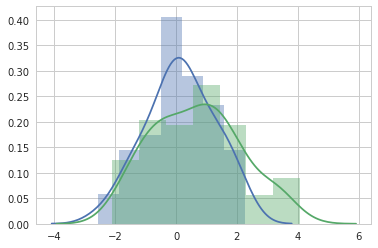

In [34]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
sns.distplot(x1)
sns.distplot(x2)
print(sp.stats.ks_2samp(x1, x2))
plt.show() # 4.95%, 유의수준 5%일 때 기각

---

### Q1. 어떤 동전을 15번 던졌더니 12번이 앞면이 나왔다. 이 동전은 휘어지지 않은 공정한 동전(fair coin)인가?

$$\text{Bin}(n \geq 12;N=15, \theta=0.5) = 1 - F(11;N=15, \theta=0.5) = 0.017578125$$

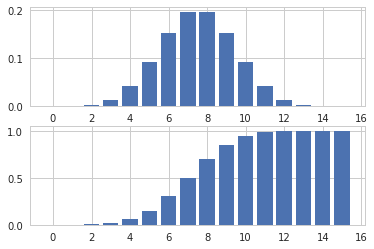

In [28]:
rv = sp.stats.binom(15,0.5)
xx = np.arange(16)
plt.subplot(211)
plt.bar(xx, rv.pmf(xx))
plt.subplot(212)
plt.bar(xx, rv.cdf(xx))
plt.show()

In [29]:
1 - sp.stats.binom(15, 0.5).cdf(12-1) 
# 1% 보다 높고 5%보다 낮다
# 유의수준이 1%면 채택, 5%면 기각

0.017578125

### Q2. 
어떤 트레이더의 일주일 수익률은 다음과 같다

-2.5%, -5%, 4.3%, -3.7% -5.6% 

이 트레이더는 계속해서 돈을 잃을 사람인가?

In [30]:
x = np.array([-0.025, -0.05, 0.043, -0.037, -0.056])
print(x.mean(), x.std(ddof=1))
test = x.mean()/x.std(ddof=1)*np.sqrt(len(x))
test, sp.stats.t(df=(5-1)*1).cdf(test)

-0.025 0.0398559907668


(-1.4025921414082105, 0.11669216509589829)

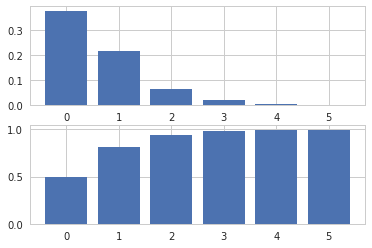

In [31]:
xx = np.arange(6)
rv = sp.stats.t(df=1*4)
plt.subplot(211)
plt.bar(xx, rv.pdf(xx))
plt.subplot(212)
plt.bar(xx, rv.cdf(xx))
plt.show()

---

### MLE
베르누이 분포 모수추정

In [32]:
np.random.seed(0)
theta0 = 0.65 # 모수 설정
x = sp.stats.bernoulli(theta0).rvs(1000) #랜덤 샘플 생성
N0, N1 = np.bincount(x, minlength=2) # 앞, 뒷면 갯수 카운트
print(N0, N1)
N = N0 + N1 # 전체 횟수 = 각 횟수 합
theta = N1/N # 
theta

344 656


0.65600000000000003

카테고리 분포 모수 추정

In [33]:
np.random.seed(0)
theta0 = np.array([0.1, 0.3, 0.6]) # 모수 설정
x = np.random.choice(np.arange(3), 1000, p=theta0) #랜덤 샘플 생성
N0, N1, N2 = np.bincount(x, minlength=3) # 1, 2, 3 카운트
N = N0 + N1 + N2 # 전체 횟수
theta = np.array([N0, N1, N2]) / N
theta

array([ 0.098,  0.317,  0.585])